In [1]:
#1st step load and understand data
import pandas as pd

df = pd.read_csv("student_sucess_dataset.csv")

print("Sample Rows")
print(df.head())#first 5 rows print krna

print("DataSet Shape")#ki kitne rows and columns h find krna
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

print("Dataset info")
print(df.info())

print("Summary Statistics")
print(df.describe(include='all'))

print("Missing Values")
print(df.isnull().sum())

Sample Rows
   StudyHours  Attendance  PassScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes
DataSet Shape
Rows: 20, Columns: 6
Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PassScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None
Summary Statistics
        StudyHours  Attendance  PassScore Internet  Sl

In [5]:
#2nd step preprocessing clean data find missing values
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("student_sucess_dataset.csv")

print("Missing Values in each column")
print(df.isnull().sum())

le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])#yes 1 and no o
df['Passed'] = le.fit_transform(df["Passed"])

print("After Encoding")
print(df.head())

print('Data-types after cleaning')
print(df.dtypes)

Missing Values in each column
StudyHours    0
Attendance    0
PassScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64
After Encoding
   StudyHours  Attendance  PassScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
Data-types after cleaning
StudyHours    int64
Attendance    int64
PassScore     int64
Internet      int32
SleepHours    int64
Passed        int32
dtype: object


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



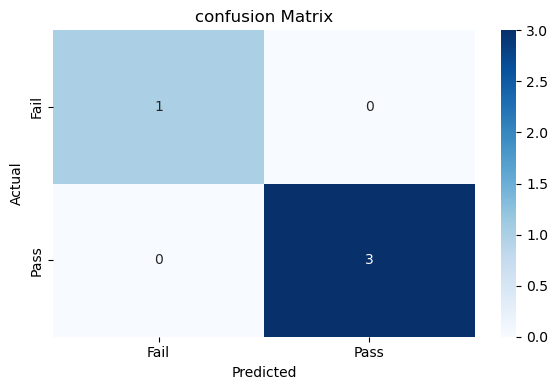

-----Predict Your Result------


Enter study hours:  5
Enter attendance:  70
Enter pass score:  70
Enter sleep hours:  7


Prediction Based on input: Pass


C:\Users\victu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
 #3rd step feature scaling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("student_sucess_dataset.csv")


le = LabelEncoder()
df['Internet'] = le.fit_transform(df["Internet"])#yes 1 and no o
df['Passed'] = le.fit_transform(df["Passed"])

features = ['StudyHours', 'Attendance', 'PassScore', 'SleepHours']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

X = df_scaled[features] #features
y = df_scaled['Passed'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.tight_layout()
plt.show()

print("-----Predict Your Result------")
try:
    study_hours = float(input("Enter study hours: "))
    attendance = float(input("Enter attendance: "))
    pass_score = float(input("Enter pass score: "))
    sleep_hours = float(input("Enter sleep hours: "))


    user_input_df = pd.DataFrame([{
         'StudyHours': study_hours,
         'Attendance': attendance,
         'PassScore': pass_score,
         'SleepHours': sleep_hours
    }])

    user_input_scaled = scaler.transform(user_input_df)

    prediction = model.predict(user_input_scaled)[0]

    result = "Pass" if prediction == 1 else "Fail"
    print(f"Prediction Based on input: {result}")
except Exception as e:
    print("An error occured", e)
